# Financial Time-Series Forecasting Challenge

### Data Import & Visualization

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To make this notebook's output stable across runs

In [12]:
np.random.seed(42)

Importing test and train dataset, using `os.getcwd()` to get current working directory and then finding the .csv(s) in the `data` subfolder

In [13]:
test = pd.read_csv(os.getcwd()+"/data/test.csv")
train =pd.read_csv(os.getcwd()+"/data/train.csv")

Using `.head()` to preview train and test datasets

In [14]:
train.head()

,w,y,0,1,2,3,4,5,6,7,...,40,41,42,43,44,45,46,47,48,49
0,1,0.483130,0.790980,0.702555,0.528220,0.298746,0.025488,-0.173480,-0.245290,-0.405057,...,0.954288,1.143901,1.359252,1.081061,1.364409,1.449354,1.195431,1.195992,1.165327,0.771110
1,1,1.135624,0.765286,0.604512,0.414197,0.241638,0.181862,-0.031920,-0.070617,-0.185980,...,0.561545,0.678086,0.848950,1.133852,1.041396,1.242806,1.248121,1.331348,1.267123,1.292718
2,1,0.686081,0.702834,0.637708,0.798416,0.755065,0.705225,0.535391,0.613129,0.549732,...,1.328694,1.324254,1.272889,1.074786,0.753950,0.539693,0.402041,0.442759,0.487557,0.699007
3,1,-1.342005,0.018378,-0.097297,-0.020850,-0.083325,-0.268512,-0.486335,-0.731130,-0.924458,...,-0.386676,-0.357946,-0.612069,-0.698063,-0.891789,-1.127624,-1.535678,-1.490786,-1.856840,-1.441472
4,1,-0.241418,0.463120,0.665307,0.446953,0.480780,0.392500,0.309231,0.158462,0.190963,...,-0.174944,-0.529541,-0.191921,-0.258093,-0.542403,-0.414866,-0.485580,-0.768820,-0.662573,-0.211837


In [15]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,-0.670595,-0.839068,-0.734415,-0.587261,-0.788800,-0.975857,-0.774088,-1.021334,-1.110286,-0.893337,...,-0.997627,-1.103794,-1.092988,-0.989165,-0.827528,-0.813729,-0.532411,-0.289483,-0.407720,-0.407505
1,0.188165,0.166410,0.321011,0.318078,0.641710,0.951932,1.170069,1.177711,0.987763,0.981345,...,0.743405,0.916254,0.866453,0.953677,0.716259,0.692816,0.446713,0.539733,0.279293,0.180641
2,0.886510,0.760716,0.751800,0.052198,-0.050958,-0.140734,-0.173480,0.178508,0.198187,0.357906,...,0.444142,0.492294,0.573348,0.546323,0.373874,0.699132,0.808303,1.118522,1.284887,1.541929
3,-0.187722,0.030199,-0.072558,-0.098400,-0.110795,-0.127632,-0.241193,-0.374608,-0.651771,-0.513491,...,-0.340927,-0.268253,-0.654777,-1.133722,-1.484557,-1.446644,-1.654337,-1.521009,-1.593825,-1.110684
4,0.248822,0.168815,0.260804,0.505885,0.471486,1.018661,0.971406,1.062348,0.986871,0.947982,...,0.422044,0.688196,0.382416,0.344843,0.177595,0.330549,0.595061,0.884860,1.125103,1.220779


We now drop the `y` label (that is the one that we'll predict) from the training set and also `w` that is useless

In [16]:
financial_train = train.drop(["y", "w"], axis=1)

y = train["y"].copy()
financial_train.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.790980,0.702555,0.528220,0.298746,0.025488,-0.173480,-0.245290,-0.405057,-0.371818,-0.032334,...,0.954288,1.143901,1.359252,1.081061,1.364409,1.449354,1.195431,1.195992,1.165327,0.771110
1,0.765286,0.604512,0.414197,0.241638,0.181862,-0.031920,-0.070617,-0.185980,-0.188546,0.275131,...,0.561545,0.678086,0.848950,1.133852,1.041396,1.242806,1.248121,1.331348,1.267123,1.292718
2,0.702834,0.637708,0.798416,0.755065,0.705225,0.535391,0.613129,0.549732,0.472387,0.431216,...,1.328694,1.324254,1.272889,1.074786,0.753950,0.539693,0.402041,0.442759,0.487557,0.699007
3,0.018378,-0.097297,-0.020850,-0.083325,-0.268512,-0.486335,-0.731130,-0.924458,-0.995159,-1.352881,...,-0.386676,-0.357946,-0.612069,-0.698063,-0.891789,-1.127624,-1.535678,-1.490786,-1.856840,-1.441472
4,0.463120,0.665307,0.446953,0.480780,0.392500,0.309231,0.158462,0.190963,0.273600,0.198676,...,-0.174944,-0.529541,-0.191921,-0.258093,-0.542403,-0.414866,-0.485580,-0.768820,-0.662573,-0.211837


We now check so that for `null` values in the dataset.

We could also use `.info()` to have more information like the Dtypes of the data.

In [17]:
financial_train.isnull().values.any()
#financial_train.info()

False

We now print the mean and the standard deviation for `financial_train` and after the plot for the correlation

In [18]:
mean = np.array(financial_train.mean(axis=0))
std = np.array(financial_train.std(axis=0))
print(f"mean:\n\n{mean} \n\n std: \n\n{std}")

mean:

[0.01690311 0.01897392 0.02320434 0.02763826 0.03106758 0.03990432
 0.04564649 0.05125901 0.05523723 0.05998229 0.06348559 0.06059931
 0.0595254  0.05751156 0.05432058 0.04932228 0.04643498 0.04403553
 0.0406522  0.04198718 0.0409172  0.04040852 0.04092458 0.0464065
 0.04816842 0.05133673 0.05514936 0.05567795 0.05729535 0.05941809
 0.05451284 0.05246735 0.05084397 0.04789078 0.04369453 0.04131472
 0.03917703 0.03669292 0.03443982 0.0305863  0.03662203 0.03902369
 0.04360521 0.04540032 0.04947673 0.05575918 0.06071495 0.07043613
 0.07828405 0.08102811] 

 std: 

[0.52541053 0.52491514 0.52848951 0.53464913 0.53880475 0.5417865
 0.54870909 0.55419235 0.55770326 0.56149684 0.560994   0.56543377
 0.56992756 0.57350887 0.57712409 0.57916214 0.58666059 0.58964479
 0.5969637  0.60356411 0.60950638 0.6191625  0.62788191 0.63977145
 0.64798546 0.65465379 0.66365014 0.66996123 0.67578322 0.68552744
 0.6940925  0.70205383 0.71153066 0.71805973 0.72637984 0.73511858
 0.74174153 0.74887765 

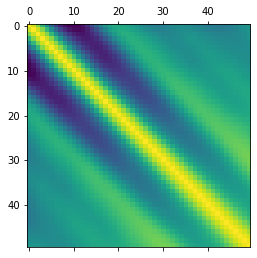

In [19]:
plt.matshow(financial_train.corr())
plt.show()

We now do a summary print

In [20]:
pd.set_option('precision', 2)
print(financial_train.describe())

              0         1         2         3        4        5        6  \
count  7.33e+03  7.33e+03  7.33e+03  7.33e+03  7326.00  7326.00  7326.00   
mean   1.69e-02  1.90e-02  2.32e-02  2.76e-02     0.03     0.04     0.05   
std    5.25e-01  5.25e-01  5.28e-01  5.35e-01     0.54     0.54     0.55   
min   -1.26e+00 -1.27e+00 -1.27e+00 -1.26e+00    -1.33    -1.28    -1.36   
25%   -3.67e-01 -3.61e-01 -3.59e-01 -3.67e-01    -0.37    -0.35    -0.35   
50%   -3.59e-03 -1.57e-03  2.99e-03  9.82e-03     0.02     0.03     0.03   
75%    3.85e-01  3.80e-01  3.87e-01  4.10e-01     0.43     0.44     0.44   
max    1.39e+00  1.41e+00  1.42e+00  1.44e+00     1.39     1.38     1.41   

             7        8        9  ...       40       41       42       43  \
count  7326.00  7326.00  7326.00  ...  7326.00  7326.00  7326.00  7326.00   
mean      0.05     0.06     0.06  ...     0.04     0.04     0.04     0.05   
std       0.55     0.56     0.56  ...     0.78     0.79     0.80     0.81   
min    

### Data Preparation

We now use `StandardScaler` from `sklearn.preprocessing` to standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as: $z = \frac{x-\mu}{\sigma}$

where $\mu$ is the mean of the training samples and $\sigma$ is the standard deviation of the training samples. Then it's printed the first element of the standardized training set that is `fin_train_tr`

In [21]:
import sklearn
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#print(scaler.fit(financial_train))
#print(scaler.transform(financial_train))
fin_train_tr = scaler.fit_transform(financial_train)
fin_train_tr[0]

array([ 1.47338019,  1.30235825,  0.95564801,  0.50711092, -0.01035549,
       -0.39387997, -0.5302557 , -0.82344513, -0.76579133, -0.16442222,
        0.13738692,  0.583178  ,  0.63846677,  0.65639649,  0.63737201,
        0.88648875,  1.15512339,  1.40222914,  1.27671247,  1.20540183,
        1.41247976,  1.5211402 ,  1.61250985,  1.74262046,  1.54044274,
        1.02274007,  0.7181615 ,  0.23427535, -0.16626768,  0.1978177 ,
       -0.40068443, -0.20931982,  0.51195996,  0.51298375,  0.59917762,
        1.04173587,  1.18806649,  0.98412464,  1.12846276,  1.34941833,
        1.17714117,  1.3953899 ,  1.64173646,  1.27315984,  1.59291723,
        1.67310954,  1.33851173,  1.30566091,  1.23364047,  0.7724038 ])

And we can check the structure of `fin_train_tr` by looking at it shape

In [22]:
fin_train_tr.shape

(7326, 50)

### Linear Regression

Now, the data prepared before are fitted into the linear regression

In [23]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
reg=lin_reg.fit(fin_train_tr, y)

and the coefficients obtained regressing are printed

In [24]:
reg.coef_

array([-0.03344353, -0.0218639 , -0.00479024,  0.01003545,  0.00906221,
        0.00337682, -0.02607611, -0.00478668, -0.00922735, -0.00635232,
       -0.0164575 ,  0.01184526, -0.0049513 ,  0.00494387,  0.00489573,
       -0.01737873,  0.0032157 ,  0.00092394,  0.01924829,  0.02337346,
        0.02882373,  0.0328648 ,  0.00446   ,  0.00352186,  0.01412366,
        0.00580924,  0.01399462,  0.05154996,  0.03942301,  0.02664389,
       -0.01186767,  0.00286495, -0.0028503 ,  0.03214937,  0.0547392 ,
        0.06090827,  0.03875844, -0.01538457, -0.04309818, -0.05687409,
       -0.00575772,  0.02812204,  0.05595678,  0.03568889, -0.00253793,
       -0.13082635, -0.17044395, -0.06741403,  0.24414514,  0.71137959])

### Error evaluation (on the training set)

Firts is computed the MSE

In [25]:
from sklearn.metrics import mean_squared_error

fin_predictions = lin_reg.predict(fin_train_tr)
lin_mse = mean_squared_error(y, fin_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.15053862493315537

and then MAE

In [26]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y, fin_predictions)
lin_mae

0.12126773129689675

### XGboost

In [32]:
from scipy.stats import uniform, randint
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
import xgboost as xgb

In [77]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(["y", "w"],axis=1), train["y"].values, test_size=0.2, random_state=42)

XGBRegressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
       silent=None, subsample=1, verbosity=1)

xgb_model = XGBRegressor

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_train)


mse=mean_squared_error(y_train, y_pred)
print(np.sqrt(mse))

0.0010456557576390536


## param optimization - NEED TO BE ADJUSTED! 
currently produces parameters that are worst than the default one

In [73]:
xgb1 = xgb.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [0.005, .01, .03, 0.7], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [1000]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)


Fitting 2 folds for each of 42 candidates, totalling 84 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
/Users/ghiso/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:  6.6min
[Parallel(n_jobs=5)]: Done  84 out of  84 | elapsed: 11.7min finished


[13:04:44] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


0.9743907731847772
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 1000, 'nthread': 4, 'objective': 'reg:squarederror', 'silent': 1, 'subsample': 0.7}


### Save file to be submitted

In [69]:
#np.savetxt("submissions.txt", y_pred,delimiter = ",")